# Exploratory Analysis

## Table of Contents
- [Importing data](#section1)
- [Exploratory analysis](#section2)
- [Data cleaning](#section3)

# Importing data <a class="anchor" id="section1"></a>

In [2]:
import os
#os.chdir("C:/Users")

In [3]:
# Import files and Merging all years (2018-2021)
import pandas as pd
pd.set_option("display.max_columns", None)
files = ['Land_value_estimation/Data/valeursfoncieres-2018.txt','Land_value_estimation/Data/valeursfoncieres-2019.txt','Land_value_estimation/Data/valeursfoncieres-2020.txt','Land_value_estimation/Data/valeursfoncieres-2021.txt']
dataframes = []
for file in files:
    # Assuming your text files have a similar structure with columns
    df = pd.read_csv(file, sep='|',low_memory=False)  # Change delimiter if needed
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
pd.set_option('display.max_columns', None)
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,"109000,00",13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,01,53,NaN,AN,73,NaN,1,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,73.0,4.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,"109000,00",13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,01,53,NaN,AN,73,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,"239300,00",4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,S,NaN,949.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,"239300,00",4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,AG,JARD,420.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,"239300,00",4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,51.0,2.0,AG,JARD,420.0


In [4]:
# replace comma to dot on column 'Valeur fonciere'
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)

# Exploratory analysis <a class="anchor" id="section2"></a>

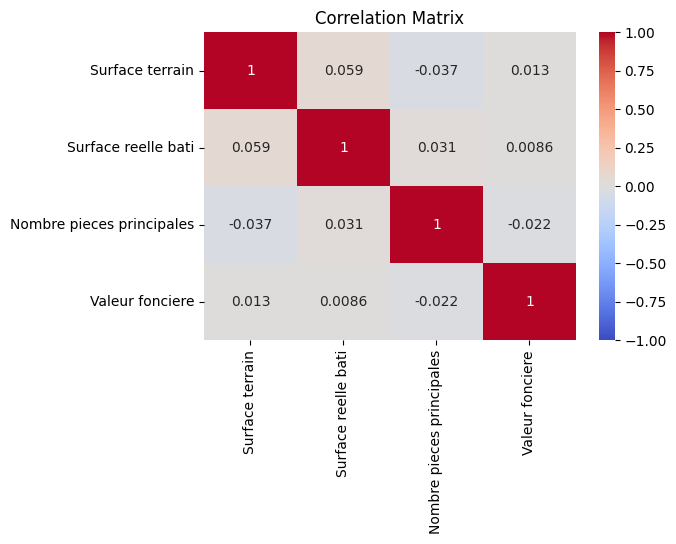

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix 
selected_vars = df[['Surface terrain', 'Surface reelle bati','Nombre pieces principales','Valeur fonciere']]
correlation_matrix = selected_vars.corr()
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Display missing values percentages
missing_values = df.isna().sum() * 100 / len(df)
print(missing_values)

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 1.098088
No voie                        39.393070
B/T/Q                          95.565432
Type de voie                   41.246307
Code voie                       0.850295
Voie                            0.852087
Code postal                     0.854441
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.321103
Section                         0.003174
No plan                         0.000000
No Volume                      99.742660
1er lot         

In [7]:
import pandas as pd


# Définir une fonction pour supprimer les outliers en fonction de 'Valeur fonciere'
def remove_outliers_iqr_x(df, column_name_x):
    Q1 = df[column_name_x].quantile(0.25)
    Q3 = df[column_name_x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name_x] >= lower_bound) & (df[column_name_x] <= upper_bound)]
    return filtered_df

# Spécifiez la colonne 'Valeur fonciere' que vous souhaitez filtrer
column_to_filter_x = "Surface reelle bati"

# Supprimer les outliers en fonction de 'Valeur fonciere'
df = remove_outliers_iqr_x(df, column_to_filter_x)

# 'filtered_df' contient maintenant votre jeu de données avec les outliers uniquement pour 'Valeur fonciere' supprimés

In [8]:
# correlation matrix 
selected_vars = df[['Surface terrain', 'Surface reelle bati','Nombre pieces principales','Valeur fonciere']]
correlation_matrix = selected_vars.corr()
print(correlation_matrix)

                           Surface terrain  Surface reelle bati  \
Surface terrain                   1.000000            -0.030332   
Surface reelle bati              -0.030332             1.000000   
Nombre pieces principales        -0.034146             0.857098   
Valeur fonciere                   0.054110            -0.028196   

                           Nombre pieces principales  Valeur fonciere  
Surface terrain                            -0.034146         0.054110  
Surface reelle bati                         0.857098        -0.028196  
Nombre pieces principales                   1.000000        -0.022586  
Valeur fonciere                            -0.022586         1.000000  


In [9]:
# Display missing values percentages
missing_values = df.isna().sum() * 100 / len(df)
print(missing_values)

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.713289
No voie                         2.276919
B/T/Q                          92.881360
Type de voie                   11.103137
Code voie                       0.000000
Voie                            0.001458
Code postal                     0.004864
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.584817
Section                         0.004111
No plan                         0.000000
No Volume                     100.000000
1er lot         

# Data cleaning <a class="anchor" id="section3"></a>

In [10]:
# Drop columns with 90% missing values
columns = missing_values[(missing_values <= 90)|(missing_values.index=='Nature culture speciale')].index
df = df[columns]

In [11]:
# Remove lines that are duplicates based on 'Voie', 'Code voie', 'Code postal', and 'Date mutation'.
df['Adresse'] = df['Voie'] + df['Code voie'].astype(str) + df['Code postal'].astype(str) + df['Date mutation']
group_counts = df['Adresse'].value_counts()
repeated_groups = group_counts[group_counts >= 2].index
result = df[df['Adresse'].isin(repeated_groups)]
print(result.head())

   No disposition Date mutation Nature mutation  Valeur fonciere  No voie  \
0               1    03/01/2018           Vente         109000.0     13.0   
1               1    03/01/2018           Vente         109000.0     13.0   
2               1    04/01/2018           Vente         239300.0      4.0   
3               1    04/01/2018           Vente         239300.0      4.0   
4               1    04/01/2018           Vente         239300.0      4.0   

  Type de voie Code voie            Voie  Code postal           Commune  \
0          RUE      1660     GEN LOGEROT       1000.0   BOURG-EN-BRESSE   
1          RUE      1660     GEN LOGEROT       1000.0   BOURG-EN-BRESSE   
2          RUE      0025  DE LA BARMETTE       1250.0  NIVIGNE ET SURAN   
3          RUE      0025  DE LA BARMETTE       1250.0  NIVIGNE ET SURAN   
4          RUE      0025  DE LA BARMETTE       1250.0  NIVIGNE ET SURAN   

  Code departement  Code commune Section  No plan 1er lot  \
0               01       

In [12]:
#doublons = df[df.duplicated(subset='Adresse', keep=False)]
df = df.drop_duplicates(subset='Adresse', keep=False)
df.drop('Adresse',axis=1,inplace=True)

In [13]:
# Drop 
df.drop('1er lot',axis=1,inplace=True)

In [14]:
df.loc[(df['Valeur fonciere']==0)]

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Surface Carrez du 1er lot,2eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain


In [15]:
df.loc[(df['Valeur fonciere']==1)]

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Surface Carrez du 1er lot,2eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
6906,1,08/10/2018,Vente,1.0,5461.0,NaN,B021,CHAMP DE LA VILLE,1240.0,LENT,01,211,E,454,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,0.0,0.0,AB,NaN,567.0
15661,1,16/04/2018,Vente,1.0,115.0,CHE,0110,DU JOURNANS,1170.0,CESSY,01,71,AO,30,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,0.0,0.0,S,NaN,100.0
18931,1,06/07/2018,Vente,1.0,9008.0,RUE,0067,ANDRE CITROEN,1500.0,AMBERIEU-EN-BUGEY,01,4,AK,435,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,0.0,0.0,S,NaN,4714.0
23222,1,24/09/2018,Vente,1.0,180.0,GR,0046,GRANDE RUE,1640.0,SAINT-JEAN-LE-VIEUX,01,363,AB,32,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,46.0,0.0,NaN,NaN,NaN
26140,2,23/11/2018,Vente,1.0,5.0,RUE,0142,DE LA VERCHERE,1450.0,PONCIN,01,303,AB,524,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,124.0,0.0,S,NaN,1285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15117479,1,23/03/2021,Vente,1.0,28.0,RUE,3536,DES FAVORITES,75015.0,PARIS 15,75,115,AD,53,NaN,NaN,1,2.0,Appartement,44.0,2.0,NaN,NaN,NaN
15120691,2,04/05/2021,Vente,1.0,5.0,RUE,0136,DE L ALBONI,75016.0,PARIS 16,75,116,CG,41,NaN,NaN,1,2.0,Appartement,35.0,2.0,NaN,NaN,NaN
15122810,1,10/02/2021,Vente,1.0,18.0,RUE,5461,LECUYER,75018.0,PARIS 18,75,118,BK,110,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
15122963,1,02/03/2021,Vente,1.0,44.0,BD,2113,DE CLICHY,75018.0,PARIS 18,75,118,AR,103,NaN,44,2,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [16]:
# Deleting lines where valeur foncière == 0/1
df = df.loc[~df['Valeur fonciere'].isin([0, 1])]

In [17]:
print(df['Nature culture speciale'].unique())

[nan 'MARAI' 'PATUR' 'FRICH' 'POTAG' 'JARD' 'ETANG' 'VAGUE' 'CHEM' 'IMM'
 'RUE' 'OLIVE' 'MARNA' 'CANAL' 'FLOR' 'CHAT' 'CHENE' 'SAPIN' 'BROUS'
 'PARC' 'FER' 'PIN' 'SPORT' 'LEGUM' 'ROC' 'CHTRU' 'VAOC' 'MARE' 'FAMIL'
 'BRUY' 'PACAG' 'PATIS' 'CAMP' 'MAQUI' 'CHLIE' 'CHVER' 'RUINE' 'ALLEE'
 'AIRE' 'ACACI' 'HETRE' 'PLVEN' 'VIGNE' 'NOYER' 'POMME' 'CHASS' 'CRESS'
 'FOUG' 'PECHE' 'VDQS' 'CIDRE' 'HTIGE' 'BTIGE' 'MARAM' 'AULN' 'PROTE'
 'FILAO' 'IMPRO' 'SABLE' 'SALIN' 'CLAIR' 'PEPIN' 'AMAND' 'JOUAL' 'CERIS'
 'INTEN' 'LAC' 'NPECH' 'TOUYA' 'SERRE' 'ABRIC' 'HAIES' 'PASS' 'FOSSE'
 'MELEZ' 'MAREC' 'ORANG' 'DUNE' 'BOUL' 'PAFEU' 'CASS']


In [18]:
# Replace the na with a new modality or value
df['Nature culture speciale'] = df['Nature culture speciale'].fillna('NON DEFINI')
df['Nature culture'] = df['Nature culture'].fillna('NON DEFINI')
df['Type de voie'] = df['Type de voie'].fillna('NON DEFINI')
df['Surface terrain'] = df['Surface terrain'].fillna(0)

In [19]:
# Drop lines with na in columns
df = df.dropna(subset=['Type local'])
df = df.dropna(subset=['Nombre pieces principales'])
df = df.dropna(subset=['No voie'])
df = df.dropna(subset=['Section'])
#df = df.dropna(subset=['Surface terrain'])

df['Mois'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y').dt.month

df = df.drop('Date mutation', axis=1)

In [20]:
# Convert column types
df['Nombre pieces principales'] = df['Nombre pieces principales'].astype(int)
df['No voie'] = df['No voie'].astype(int)
df['Code type local'] = df['Code type local'].astype(int)
df['Code postal'] = df['Code postal'].astype(str)

In [21]:
# Remove '.0' in the Code postal after convertion to string
df['Code postal'] = df['Code postal'].str.slice(0, -2)

In [22]:
# Display missing values percentages
missing_values = df.isna().sum() * 100 / len(df)
print(missing_values)

No disposition                0.000000
Nature mutation               0.000000
Valeur fonciere               0.092912
No voie                       0.000000
Type de voie                  0.000000
Code voie                     0.000000
Voie                          0.000000
Code postal                   0.000000
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Section                       0.000000
No plan                       0.000000
Surface Carrez du 1er lot    82.435344
2eme lot                     85.952436
Nombre de lots                0.000000
Code type local               0.000000
Type local                    0.000000
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Nature culture                0.000000
Nature culture speciale       0.000000
Surface terrain               0.000000
Mois                          0.000000
dtype: float64


In [23]:
df.shape

(2537892, 24)

In [24]:
df['Mois'].head(20)

7      1
11     1
12     1
26     1
28     1
31     1
36     1
39     1
40     1
41     1
42     1
43     1
101    1
121    1
124    1
127    1
128    1
129    1
146    1
161    1
Name: Mois, dtype: int32

In [25]:
# numerise the non numeric variable type local
df  = pd.get_dummies(data=df, columns=['Type local'])
df.head()

,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Surface Carrez du 1er lot,2eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Mois,Type local_Appartement,Type local_Dépendance,Type local_Local industriel. commercial ou assimilé,Type local_Maison
7,1,Vente,90000.0,5050,NON DEFINI,B034,LE DRUILLET,1380,SAINT-CYR-SUR-MENTHON,01,343,ZR,361,NaN,NaN,0,1,150.0,3,S,NON DEFINI,347.0,1,False,False,False,True
11,1,Vente,67000.0,12,ALL,3044,DE LA PETITE REYSSOUZE,1000,BOURG-EN-BRESSE,01,53,BD,227,NaN,NaN,1,2,45.0,1,NON DEFINI,NON DEFINI,0.0,1,True,False,False,False
12,1,Vente,76200.0,5,RUE,2690,MOLIERE,1000,BOURG-EN-BRESSE,01,53,AP,152,NaN,209,2,2,68.0,3,NON DEFINI,NON DEFINI,0.0,1,True,False,False,False
26,1,Vente,90000.0,5047,NON DEFINI,B530,LE POYET,1380,BAGE-DOMMARTIN,01,25,C,830,NaN,NaN,0,1,120.0,3,S,NON DEFINI,2416.0,1,False,False,False,True
28,1,Vente,130000.0,10,RUE,0130,DE LA POMPE,1160,VARAMBON,01,430,C,528,NaN,NaN,0,1,80.0,3,S,NON DEFINI,55.0,1,False,False,False,True


In [26]:
#drop 'Type local_Local industriel. commercial ou assimilé'
df = df[df['Type local_Local industriel. commercial ou assimilé'] == 0]
del df['Type local_Local industriel. commercial ou assimilé']
df.head()

,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Surface Carrez du 1er lot,2eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Mois,Type local_Appartement,Type local_Dépendance,Type local_Maison
7,1,Vente,90000.0,5050,NON DEFINI,B034,LE DRUILLET,1380,SAINT-CYR-SUR-MENTHON,01,343,ZR,361,NaN,NaN,0,1,150.0,3,S,NON DEFINI,347.0,1,False,False,True
11,1,Vente,67000.0,12,ALL,3044,DE LA PETITE REYSSOUZE,1000,BOURG-EN-BRESSE,01,53,BD,227,NaN,NaN,1,2,45.0,1,NON DEFINI,NON DEFINI,0.0,1,True,False,False
12,1,Vente,76200.0,5,RUE,2690,MOLIERE,1000,BOURG-EN-BRESSE,01,53,AP,152,NaN,209,2,2,68.0,3,NON DEFINI,NON DEFINI,0.0,1,True,False,False
26,1,Vente,90000.0,5047,NON DEFINI,B530,LE POYET,1380,BAGE-DOMMARTIN,01,25,C,830,NaN,NaN,0,1,120.0,3,S,NON DEFINI,2416.0,1,False,False,True
28,1,Vente,130000.0,10,RUE,0130,DE LA POMPE,1160,VARAMBON,01,430,C,528,NaN,NaN,0,1,80.0,3,S,NON DEFINI,55.0,1,False,False,True


# Enrichissement

In [27]:
# Load enrichment data
data_enrichment = pd.read_csv("Land_value_estimation/Notebooks/dvf-communes.csv", delimiter=';')
data_enrichment

,ID,INSEE_COM,INSEE_DEP,INSEE_REG,CODE_EPCI,NOM_COM_M,POPULATION,Nb_Ventes,PrixMoyen_M2
0,COMMUNE_0000000009760754,32216,32,76,200072320.0,LOURTIES MONBRUN,152,NaN,NaN
1,COMMUNE_0000000009756744,47033,47,75,200036523.0,BOUDY DE BEAUREGARD,412,4.0,1421.0
2,COMMUNE_0000000009760252,32009,32,76,243200425.0,ARMOUS ET CAU,86,NaN,NaN
3,COMMUNE_0000000009754403,38225,38,84,243801024.0,AUTRANS MEAUDRE EN VERCORS,2969,47.0,2667.0
4,COMMUNE_0000000009727903,62890,62,32,200044030.0,WILLEMAN,182,3.0,967.0
...,...,...,...,...,...,...,...,...,...
34881,COMMUNE_0000000009762978,31068,31,76,200072635.0,BILLIERE,20,2.0,1043.0
34882,COMMUNE_0000000009763100,31404,31,76,200072635.0,OO,88,NaN,NaN
34883,COMMUNE_0000000009763099,31123,31,76,200072635.0,CASTILLON DE LARBOUST,54,3.0,2523.0
34884,COMMUNE_0000000009763098,31133,31,76,200072635.0,CAZEAUX DE LARBOUST,94,2.0,1339.0


In [28]:
# Load enrichment data
df_enrichment = pd.read_csv("Land_value_estimation/Notebooks/dvf-communes.csv", delimiter=';')
df_enrichment

# Create a DataFrame containing median values per department
#df_enrichment2 = df_enrichment2.groupby('INSEE_DEP')['PrixMoyen_M2'].median().reset_index()
df_enrichment['PrixMoyen_M2'].astype('float')

median_insee_com = df_enrichment['PrixMoyen_M2'].median()

# Rename the column containing the median values
#df_enrichment2.rename(columns={'Value_M2': 'PrixMoyen_M2'}, inplace=True)

# Calculer la moyenne des valeurs insee-dep
# = df_enrichment2['INSEE_DEP'].mean()
# Remplacer les NaN dans la colonne "valeur" par la moyenne
df_enrichment['PrixMoyen_M2'].fillna(median_insee_com, inplace=True)

# Displaying the new DataFrame
df_enrichment

,ID,INSEE_COM,INSEE_DEP,INSEE_REG,CODE_EPCI,NOM_COM_M,POPULATION,Nb_Ventes,PrixMoyen_M2
0,COMMUNE_0000000009760754,32216,32,76,200072320.0,LOURTIES MONBRUN,152,NaN,1449.5
1,COMMUNE_0000000009756744,47033,47,75,200036523.0,BOUDY DE BEAUREGARD,412,4.0,1421.0
2,COMMUNE_0000000009760252,32009,32,76,243200425.0,ARMOUS ET CAU,86,NaN,1449.5
3,COMMUNE_0000000009754403,38225,38,84,243801024.0,AUTRANS MEAUDRE EN VERCORS,2969,47.0,2667.0
4,COMMUNE_0000000009727903,62890,62,32,200044030.0,WILLEMAN,182,3.0,967.0
...,...,...,...,...,...,...,...,...,...
34881,COMMUNE_0000000009762978,31068,31,76,200072635.0,BILLIERE,20,2.0,1043.0
34882,COMMUNE_0000000009763100,31404,31,76,200072635.0,OO,88,NaN,1449.5
34883,COMMUNE_0000000009763099,31123,31,76,200072635.0,CASTILLON DE LARBOUST,54,3.0,2523.0
34884,COMMUNE_0000000009763098,31133,31,76,200072635.0,CAZEAUX DE LARBOUST,94,2.0,1339.0


In [29]:
missing_values_prixm2 = df_enrichment['PrixMoyen_M2'].isna().sum() * 100 / len(df_enrichment)
missing_values_prixm2

0.0

In [30]:
df_enrichment=df_enrichment[['INSEE_COM','PrixMoyen_M2']]
df_enrichment

,INSEE_COM,PrixMoyen_M2
0,32216,1449.5
1,47033,1421.0
2,32009,1449.5
3,38225,2667.0
4,62890,967.0
...,...,...
34881,31068,1043.0
34882,31404,1449.5
34883,31123,2523.0
34884,31133,1339.0


In [31]:
df = pd.merge(df, df_enrichment, left_on='Code postal', right_on='INSEE_COM', how='inner')

df.head(50)

,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Surface Carrez du 1er lot,2eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Mois,Type local_Appartement,Type local_Dépendance,Type local_Maison,INSEE_COM,PrixMoyen_M2
0,1,Vente,90000.0,5050,NON DEFINI,B034,LE DRUILLET,1380,SAINT-CYR-SUR-MENTHON,01,343,ZR,361,NaN,NaN,0,1,150.0,3,S,NON DEFINI,347.0,1,False,False,True,1380,753.0
1,1,Vente,90000.0,5047,NON DEFINI,B530,LE POYET,1380,BAGE-DOMMARTIN,01,25,C,830,NaN,NaN,0,1,120.0,3,S,NON DEFINI,2416.0,1,False,False,True,1380,753.0
2,1,Vente,208300.0,100,IMP,0375,MONNET,1380,BAGE-DOMMARTIN,01,25,F,2192,NaN,NaN,0,1,130.0,5,S,NON DEFINI,804.0,1,False,False,True,1380,753.0
3,2,Vente,308850.0,5060,NON DEFINI,B506,MONTCROZIER,1380,BAGE-DOMMARTIN,01,25,B,499,NaN,NaN,0,1,105.0,2,J,MARAI,1620.0,1,False,False,True,1380,753.0
4,1,Vente,4000.0,5185,NON DEFINI,B012,LA GIRAUDIERE,1380,SAINT-ANDRE-DE-BAGE,01,332,A,1361,NaN,NaN,0,3,0.0,0,S,NON DEFINI,480.0,2,False,True,False,1380,753.0
5,1,Vente,112500.0,340,NON DEFINI,X003,BOUCLE DES CHANEYES,1380,BAGE-DOMMARTIN,01,25,B,1048,NaN,NaN,0,1,101.0,4,S,NON DEFINI,1194.0,2,False,False,True,1380,753.0
6,1,Vente,207000.0,145,RTE,0085,DU BOURG,1380,BAGE-DOMMARTIN,01,25,F,2175,NaN,NaN,0,1,180.0,5,S,NON DEFINI,849.0,2,False,False,True,1380,753.0
7,1,Vente,266700.0,248,RTE,0150,DE LA CHANEAZ,1380,BAGE-DOMMARTIN,01,25,F,375,NaN,NaN,0,1,160.0,7,S,NON DEFINI,1041.0,2,False,False,True,1380,753.0
8,1,Vente,116000.0,5016,NON DEFINI,B007,PRE CHALON,1380,BAGE-LE-CHATEL,01,26,A,958,NaN,NaN,0,1,80.0,2,S,NON DEFINI,958.0,2,False,False,True,1380,753.0
9,1,Vente,174639.0,51,NON DEFINI,X002,DESSERTE DES BUTILLONS,1380,BAGE-DOMMARTIN,01,25,F,2651,NaN,NaN,0,1,98.0,4,S,NON DEFINI,686.0,3,False,False,True,1380,753.0


In [32]:
# Display missing values percentages
missing_values = df.isna().sum() * 100 / len(df)
print(missing_values)

No disposition                0.000000
Nature mutation               0.000000
Valeur fonciere               0.055947
No voie                       0.000000
Type de voie                  0.000000
Code voie                     0.000000
Voie                          0.000000
Code postal                   0.000000
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Section                       0.000000
No plan                       0.000000
Surface Carrez du 1er lot    88.087895
2eme lot                     89.863999
Nombre de lots                0.000000
Code type local               0.000000
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Nature culture                0.000000
Nature culture speciale       0.000000
Surface terrain               0.000000
Mois                          0.000000
Type local_Appartement        0.000000
Type local_Dépendance         0.000000
Type local_Maison        

# Completion of the variable 'Type local'

In [33]:
# select necessary columns for knn
X_train_sans_na = df[['PrixMoyen_M2','Type local_Appartement','Type local_Dépendance','Type local_Maison','Surface reelle bati','Nombre pieces principales','Surface terrain','Nombre de lots']]

In [34]:
# remove lines with missing values at 'type local'
X_train_sans_na = X_train_sans_na.dropna(subset=['Type local_Appartement','Type local_Dépendance','Type local_Maison'])

In [35]:
X_train_sans_na.head()

,PrixMoyen_M2,Type local_Appartement,Type local_Dépendance,Type local_Maison,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots
0,753.0,False,False,True,150.0,3,347.0,0
1,753.0,False,False,True,120.0,3,2416.0,0
2,753.0,False,False,True,130.0,5,804.0,0
3,753.0,False,False,True,105.0,2,1620.0,0
4,753.0,False,True,False,0.0,0,480.0,0


In [36]:
#separate 'type local' variables from the others
y_knn = X_train_sans_na[['Type local_Appartement','Type local_Dépendance','Type local_Maison']]
X_train_sans_na = X_train_sans_na[['PrixMoyen_M2','Surface reelle bati','Nombre pieces principales','Surface terrain','Nombre de lots']]
X_train_sans_na.columns

Index(['PrixMoyen_M2', 'Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain', 'Nombre de lots'],
      dtype='object')

## Divide datas into training and testing set to make knn

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# splitting data in sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train_sans_na, y_knn, test_size=0.2, random_state=42)

In [39]:
#show the splitted data
print(X_train_knn,'/n')
print(y_train_knn,'/n'*3)
print(X_test_knn,'/n')
print(y_test_knn ,'/n')

        PrixMoyen_M2  Surface reelle bati  Nombre pieces principales  \
209543        1949.0                 90.0                          4   
235072        2311.0                 90.0                          3   
675858        1119.0                 96.0                          5   
416392        1422.0                 94.0                          5   
386838        1157.0                 76.0                          4   
...              ...                  ...                        ...   
110268        3593.0                 74.0                          4   
259178        1449.5                105.0                          4   
131932        3907.0                 47.0                          2   
671155         711.0                117.0                          4   
121958        2776.0                 10.0                          1   

        Surface terrain  Nombre de lots  
209543            203.0               0  
235072            600.0               0  
675858   

## Train the knn model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#numbers of neighbours
k = 4

knn = KNeighborsClassifier(n_neighbors=k)

In [42]:
# train the data
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=4)

In [43]:
# Test our model's results

from sklearn.metrics import f1_score, confusion_matrix

y_pred = knn.predict(X_test_knn)
print('f1_score : ' + str(f1_score(y_test_knn,y_pred,average='weighted', pos_label=1)))

f1 = f1_score(y_test_knn, y_pred, average='weighted')
print(f'Weighted F1 Score: {f1:.2f}')

f1_score : 0.9742571170183961
Weighted F1 Score: 0.97


# Estimation of the Land value

## Data preparation

In [44]:
# Display missing values percentages
missing_values = df.isna().sum() * 100 / len(df)
print(missing_values)

No disposition                0.000000
Nature mutation               0.000000
Valeur fonciere               0.055947
No voie                       0.000000
Type de voie                  0.000000
Code voie                     0.000000
Voie                          0.000000
Code postal                   0.000000
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Section                       0.000000
No plan                       0.000000
Surface Carrez du 1er lot    88.087895
2eme lot                     89.863999
Nombre de lots                0.000000
Code type local               0.000000
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Nature culture                0.000000
Nature culture speciale       0.000000
Surface terrain               0.000000
Mois                          0.000000
Type local_Appartement        0.000000
Type local_Dépendance         0.000000
Type local_Maison        

In [45]:
#suppressing missing values in "valeur fonciere"
df = df.dropna(subset='Valeur fonciere')

In [46]:
# Display missing values percentages
missing_values = df.isna().sum() * 100 / len(df)
print(missing_values)

No disposition                0.000000
Nature mutation               0.000000
Valeur fonciere               0.000000
No voie                       0.000000
Type de voie                  0.000000
Code voie                     0.000000
Voie                          0.000000
Code postal                   0.000000
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Section                       0.000000
No plan                       0.000000
Surface Carrez du 1er lot    88.083503
2eme lot                     89.861511
Nombre de lots                0.000000
Code type local               0.000000
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Nature culture                0.000000
Nature culture speciale       0.000000
Surface terrain               0.000000
Mois                          0.000000
Type local_Appartement        0.000000
Type local_Dépendance         0.000000
Type local_Maison        

In [47]:
df[(df['Type local_Appartement']==0) & (df['Type local_Dépendance']==0) & (df['Type local_Maison']==0)]

,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Surface Carrez du 1er lot,2eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Mois,Type local_Appartement,Type local_Dépendance,Type local_Maison,INSEE_COM,PrixMoyen_M2


In [48]:
# selecting the variables that will be used
#'Code departement'
#'Code type local'
# 'Nature culture','Nature culture speciale',
df2 = df[['PrixMoyen_M2','Valeur fonciere','Surface reelle bati','Nombre pieces principales','Surface terrain','Nombre de lots','Type local_Appartement', 'Type local_Dépendance', 'Type local_Maison']]
#df2 = pd.get_dummies(data = df2,columns=['Nature culture','Nature culture speciale'])
df2.head()

,PrixMoyen_M2,Valeur fonciere,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Type local_Appartement,Type local_Dépendance,Type local_Maison
0,753.0,90000.0,150.0,3,347.0,0,False,False,True
1,753.0,90000.0,120.0,3,2416.0,0,False,False,True
2,753.0,208300.0,130.0,5,804.0,0,False,False,True
3,753.0,308850.0,105.0,2,1620.0,0,False,False,True
4,753.0,4000.0,0.0,0,480.0,0,False,True,False


In [49]:
# separate 'Valeur fonciere' from the rest
y = df2['Valeur fonciere']
X = df2.copy()
del X['Valeur fonciere']
X.columns

Index(['PrixMoyen_M2', 'Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain', 'Nombre de lots', 'Type local_Appartement',
       'Type local_Dépendance', 'Type local_Maison'],
      dtype='object')

In [50]:
# Splitting the data in two sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head(),'/n')
print(y_train.head())
print('/n' * 3)
print(X_test.head(),'/n')
print(y_test.head())

         PrixMoyen_M2  Surface reelle bati  Nombre pieces principales  \
540943         1854.0                114.0                          6   
1003062        1740.0                190.0                          6   
759798         1278.0                120.0                          4   
635648         2091.0                 82.0                          4   
278300          901.0                138.0                          4   

         Surface terrain  Nombre de lots  Type local_Appartement  \
540943            1059.0               0                   False   
1003062            800.0               0                   False   
759798             831.0               0                   False   
635648              66.0               0                   False   
278300            3386.0               0                   False   

         Type local_Dépendance  Type local_Maison  
540943                   False               True  
1003062                  False               Tru

## Estimation via decision tree (regression tree)

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
from sklearn.tree import plot_tree

#plt.figure(figsize=(16,4))
#plot_tree(DTR,feature_names = list(X.columns),filled=True, fontsize=10)
#plt.show()

In [53]:


DTR = DecisionTreeRegressor(max_depth = 41,min_samples_split = 2, min_samples_leaf = 44)

DTR.fit(X_train, y_train)

y_pred2 = DTR.predict(X_test)


mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
# Calcul du RMSE en prenant la racine carrée du MSE
rmse = np.sqrt(mse)


print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print("RMSE:", rmse)
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 88340.71
Mean Squared Error: 1872602798338.34
RMSE: 1368430.7795202276
R-squared: -0.01


In [54]:
#from sklearn.linear_model import LogisticRegression

#reg_log = LogisticRegression()
#reg_log_model = reg_log.fit(X_train, y_train)
#y_pred3 = reg_log_model.predict(X_test)

#mae_2 = mean_absolute_error(y_test, y_pred3)
#mse_2 = mean_squared_error(y_test, y_pred3)
#r2_2 = r2_score(y_test, y_pred3)

#print(f'Mean Absolute Error: {mae_2:.2f}')
#print(f'Mean Squared Error: {mse_2:.2f}')
#print(f'R-squared: {r2_2:.2f}')


# Test the regression tree on the 2022 data

In [174]:
df22 = pd.read_csv('Land_value_estimation/Notebooks/submissions.csv',sep=',',low_memory=False)

In [175]:
df22.columns

Index(['Date mutation', 'Nature mutation', 'No voie', 'B/T/Q', 'Type de voie',
       'Code voie', 'Voie', 'Code postal', 'Commune', 'Code departement',
       'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume',
       '1er lot', 'Surface Carrez du 1er lot', '2eme lot',
       'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot',
       '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot',
       'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local',
       'Identifiant local', 'Surface reelle bati', 'Nombre pieces principales',
       'Nature culture', 'Nature culture speciale', 'Surface terrain', 'ID'],
      dtype='object')

In [176]:
df22 = df22.set_index('ID')

In [177]:
df22.head()

,Date mutation,Nature mutation,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,03/01/2022,Vente,13.0,NaN,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
2,03/01/2022,Vente,98.0,NaN,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
3,06/01/2022,Vente,282.0,NaN,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,1,230,NaN,ZM,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Maison,NaN,108.0,5.0,S,NaN,649.0
4,05/01/2022,Vente,7.0,NaN,RUE,0031,DU CORNIER,1150.0,VAUX-EN-BUGEY,1,431,NaN,A,1613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Maison,NaN,85.0,4.0,S,NaN,310.0
5,06/01/2022,Vente,7.0,NaN,RUE,3125,DES PINS,1000.0,BOURG-EN-BRESSE,1,53,NaN,CS,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,99.0,5.0,S,NaN,765.0


In [178]:
df22.shape

(378041, 33)

## Cleaning data

In [179]:
df22_predit=df22.copy()

In [180]:

#create a column for the month
df22['Mois'] = pd.to_datetime(df22['Date mutation'], format='%d/%m/%Y').dt.month


In [181]:
# Replace the na with a new modality or value
df22['Nature culture speciale'] = df22['Nature culture speciale'].fillna('NON DEFINI')
df22['Nature culture'] = df22['Nature culture'].fillna('NON DEFINI')
df22['Type local'] = df22['Type local'].fillna('NON DEFINI')
df22['Nombre pieces principales'] = df22['Nombre pieces principales'].fillna(0)
df22['Surface terrain'] = df22['Surface terrain'].fillna(0)
df22['Surface reelle bati'] = df22['Surface reelle bati'].fillna(0)
df22['Code postal'] = df22['Code postal'].astype(str)
# Remove '.0' in the Code postal after convertion to string
df22['Code postal'] = df22['Code postal'].str.slice(0, -2)

In [182]:
df22.columns

Index(['Date mutation', 'Nature mutation', 'No voie', 'B/T/Q', 'Type de voie',
       'Code voie', 'Voie', 'Code postal', 'Commune', 'Code departement',
       'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume',
       '1er lot', 'Surface Carrez du 1er lot', '2eme lot',
       'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot',
       '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot',
       'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local',
       'Identifiant local', 'Surface reelle bati', 'Nombre pieces principales',
       'Nature culture', 'Nature culture speciale', 'Surface terrain', 'Mois'],
      dtype='object')

In [183]:

df22 = pd.merge(df22, df_enrichment, left_on='Code postal', right_on='INSEE_COM', how='left')

#columns selection
df22 = pd.get_dummies(data=df22,columns=['Type local'])

df22

,Date mutation,Nature mutation,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Mois,INSEE_COM,PrixMoyen_M2,Type local_Appartement,Type local_Dépendance,Type local_Local industriel. commercial ou assimilé,Type local_Maison,Type local_NON DEFINI
0,03/01/2022,Vente,13.0,NaN,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,24.0,1.0,NON DEFINI,NON DEFINI,0.0,1,NaN,NaN,True,False,False,False,False
1,03/01/2022,Vente,98.0,NaN,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,140.0,3.0,NON DEFINI,NON DEFINI,0.0,1,NaN,NaN,True,False,False,False,False
2,06/01/2022,Vente,282.0,NaN,RTE,0130,DE POISATON,1560,MANTENAY-MONTLIN,1,230,NaN,ZM,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,108.0,5.0,S,NON DEFINI,649.0,1,NaN,NaN,False,False,False,True,False
3,05/01/2022,Vente,7.0,NaN,RUE,0031,DU CORNIER,1150,VAUX-EN-BUGEY,1,431,NaN,A,1613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,85.0,4.0,S,NON DEFINI,310.0,1,1150,1442.0,False,False,False,True,False
4,06/01/2022,Vente,7.0,NaN,RUE,3125,DES PINS,1000,BOURG-EN-BRESSE,1,53,NaN,CS,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,99.0,5.0,S,NON DEFINI,765.0,1,NaN,NaN,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378036,16/06/2022,Adjudication,21.0,NaN,AV,6626,MOZART,75016,PARIS 16,75,116,NaN,CM,107,NaN,126,NaN,127.0,NaN,128.0,NaN,NaN,NaN,NaN,NaN,3,NaN,24.0,1.0,NON DEFINI,NON DEFINI,0.0,6,NaN,NaN,True,False,False,False,False
378037,14/12/2022,Vente,13.0,NaN,QUAI,2296,DE CONTI,75006,PARIS 06,75,106,NaN,AB,5,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0,NON DEFINI,NON DEFINI,0.0,12,NaN,NaN,False,True,False,False,False
378038,30/12/2022,Vente,19.0,NaN,RUE,4879,JEAN DOLENT,75014,PARIS 14,75,114,NaN,AS,41,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,327.0,0.0,NON DEFINI,NON DEFINI,0.0,12,NaN,NaN,False,False,True,False,False
378039,30/12/2022,Vente,69.0,NaN,RUE,0679,BARRAULT,75013,PARIS 13,75,113,NaN,DM,28,NaN,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0,NON DEFINI,NON DEFINI,0.0,12,NaN,NaN,False,True,False,False,False


In [184]:
# Calculer la moyenne des valeurs insee-com
med_insee_com = df22['PrixMoyen_M2'].median()
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378041 entries, 0 to 378040
Data columns (total 40 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Date mutation                                        378041 non-null  object 
 1   Nature mutation                                      378041 non-null  object 
 2   No voie                                              375777 non-null  float64
 3   B/T/Q                                                26339 non-null   object 
 4   Type de voie                                         355235 non-null  object 
 5   Code voie                                            378041 non-null  object 
 6   Voie                                                 378029 non-null  object 
 7   Code postal                                          378041 non-null  object 
 8   Commune                                              3

In [185]:
# Remplacer les NaN dans la colonne "valeur" par la moyenne
df22['PrixMoyen_M2'].fillna(med_insee_com, inplace=True)

In [186]:
df22 = df22[['PrixMoyen_M2','Mois','Surface reelle bati','Nombre pieces principales','Surface terrain','Nombre de lots','Type local_Appartement','Type local_Dépendance', 'Type local_Maison','Type local_NON DEFINI']]

df22

,PrixMoyen_M2,Mois,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Type local_Appartement,Type local_Dépendance,Type local_Maison,Type local_NON DEFINI
0,1513.0,1,24.0,1.0,0.0,1,True,False,False,False
1,1513.0,1,140.0,3.0,0.0,1,True,False,False,False
2,1513.0,1,108.0,5.0,649.0,0,False,False,True,False
3,1442.0,1,85.0,4.0,310.0,0,False,False,True,False
4,1513.0,1,99.0,5.0,765.0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
378036,1513.0,6,24.0,1.0,0.0,3,True,False,False,False
378037,1513.0,12,0.0,0.0,0.0,1,False,True,False,False
378038,1513.0,12,327.0,0.0,0.0,1,False,False,False,False
378039,1513.0,12,0.0,0.0,0.0,1,False,True,False,False


In [187]:
#convert column types
df22['Nombre pieces principales'] = df22['Nombre pieces principales'].astype(int)


In [188]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378041 entries, 0 to 378040
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PrixMoyen_M2               378041 non-null  float64
 1   Mois                       378041 non-null  int32  
 2   Surface reelle bati        378041 non-null  float64
 3   Nombre pieces principales  378041 non-null  int32  
 4   Surface terrain            378041 non-null  float64
 5   Nombre de lots             378041 non-null  int64  
 6   Type local_Appartement     378041 non-null  bool   
 7   Type local_Dépendance      378041 non-null  bool   
 8   Type local_Maison          378041 non-null  bool   
 9   Type local_NON DEFINI      378041 non-null  bool   
dtypes: bool(4), float64(3), int32(2), int64(1)
memory usage: 15.9 MB


In [189]:
# Display missing values percentages
missing_values_22 = df22.isna().sum() * 100 / len(df22)
print(missing_values_22)

PrixMoyen_M2                 0.0
Mois                         0.0
Surface reelle bati          0.0
Nombre pieces principales    0.0
Surface terrain              0.0
Nombre de lots               0.0
Type local_Appartement       0.0
Type local_Dépendance        0.0
Type local_Maison            0.0
Type local_NON DEFINI        0.0
dtype: float64


In [190]:
df22.shape

(378041, 10)

In [191]:
df22.columns

Index(['PrixMoyen_M2', 'Mois', 'Surface reelle bati',
       'Nombre pieces principales', 'Surface terrain', 'Nombre de lots',
       'Type local_Appartement', 'Type local_Dépendance', 'Type local_Maison',
       'Type local_NON DEFINI'],
      dtype='object')

In [192]:
# Display missing values percentages
missing_values22 =df22.isna().sum()/len(df22)
missing_values22

PrixMoyen_M2                 0.0
Mois                         0.0
Surface reelle bati          0.0
Nombre pieces principales    0.0
Surface terrain              0.0
Nombre de lots               0.0
Type local_Appartement       0.0
Type local_Dépendance        0.0
Type local_Maison            0.0
Type local_NON DEFINI        0.0
dtype: float64

In [193]:
df22 = df22[['PrixMoyen_M2','Surface reelle bati','Nombre pieces principales','Surface terrain','Nombre de lots','Type local_Appartement', 'Type local_Dépendance', 'Type local_Maison','Type local_NON DEFINI']]

In [194]:
import warnings
warnings.filterwarnings("ignore")
# complete 'type_local' variables
df_missing = df22[(df22['Type local_Appartement']==0) & (df22['Type local_Dépendance']==0) & (df22['Type local_Maison']==0) & (df22['Type local_NON DEFINI']==1)]


df_TL_not_null = df22[(df22['Type local_NON DEFINI']==0)]

# if there are missing values at 'type local' lets predict them
if (df_missing.empty == False) :
    type_local_pred = knn.predict(df_missing[['PrixMoyen_M2','Surface reelle bati','Nombre pieces principales','Surface terrain','Nombre de lots']])


    df_missing['Type local_Appartement'] = type_local_pred[:,0]
    df_missing['Type local_Dépendance'] = type_local_pred[:,1]
    df_missing['Type local_Maison'] = type_local_pred[:,2]

    #dfTest[(dfTest['Type local_Appartement']==0) & (dfTest['Type local_Dépendance']==0) & (dfTest['Type local_Maison']==0) & (dfTest['Type local_NON DEFINI']==1)]=df_missing
    df22._append(df_missing)

In [195]:
df22.shape

(378041, 9)

In [196]:
df_TL_not_null.shape

(328041, 9)

In [197]:
df22.head()

,PrixMoyen_M2,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Type local_Appartement,Type local_Dépendance,Type local_Maison,Type local_NON DEFINI
0,1513.0,24.0,1,0.0,1,True,False,False,False
1,1513.0,140.0,3,0.0,1,True,False,False,False
2,1513.0,108.0,5,649.0,0,False,False,True,False
3,1442.0,85.0,4,310.0,0,False,False,True,False
4,1513.0,99.0,5,765.0,0,False,False,False,True


In [198]:
df22.shape

(378041, 9)

In [199]:
df22=df22.drop(['Type local_NON DEFINI'],axis=1)

In [200]:
val_fonciere_pred = DTR.predict(df22)
print(val_fonciere_pred)

[ 90832.11       300544.         259390.75324675 ... 363427.40909091
  51409.39130435  51409.39130435]


In [201]:
val_fonciere_pred.shape

(378041,)

In [202]:
val_fonciere_pred = pd.DataFrame(val_fonciere_pred, columns=['TARGET'])
val_fonciere_pred

,TARGET
0,90832.110000
1,300544.000000
2,259390.753247
3,131815.712500
4,255317.173333
...,...
378036,90832.110000
378037,51409.391304
378038,363427.409091
378039,51409.391304


In [203]:
val_fonciere_pred['ID'] = val_fonciere_pred.index + 1

In [204]:
val_fonciere_pred = val_fonciere_pred[['ID','TARGET']]
val_fonciere_pred

,ID,TARGET
0,1,90832.110000
1,2,300544.000000
2,3,259390.753247
3,4,131815.712500
4,5,255317.173333
...,...,...
378036,378037,90832.110000
378037,378038,51409.391304
378038,378039,363427.409091
378039,378040,51409.391304


In [205]:
val_fonciere_pred.to_csv('dec_tree_v4.csv',index=False)

In [206]:
def create_column(row):
    if row['Type local_Appartement'] == 1:
        return 'Appartement'
    elif row['Type local_Dépendance'] == 1:
        return 'Dépendance'
    elif row['Type local_Maison'] == 1:
        return 'Maison'
    else:
        return 'Local industriel. commercial ou assimilé'

df22['Type local prédit'] = df22.apply(create_column, axis=1)

In [207]:
df22

,PrixMoyen_M2,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Type local_Appartement,Type local_Dépendance,Type local_Maison,Type local prédit
0,1513.0,24.0,1,0.0,1,True,False,False,Appartement
1,1513.0,140.0,3,0.0,1,True,False,False,Appartement
2,1513.0,108.0,5,649.0,0,False,False,True,Maison
3,1442.0,85.0,4,310.0,0,False,False,True,Maison
4,1513.0,99.0,5,765.0,0,False,False,False,Local industriel. commercial ou assimilé
...,...,...,...,...,...,...,...,...,...
378036,1513.0,24.0,1,0.0,3,True,False,False,Appartement
378037,1513.0,0.0,0,0.0,1,False,True,False,Dépendance
378038,1513.0,327.0,0,0.0,1,False,False,False,Local industriel. commercial ou assimilé
378039,1513.0,0.0,0,0.0,1,False,True,False,Dépendance


In [208]:

val_fonciere_pred.index = val_fonciere_pred.index + 1
val_fonciere_pred

,ID,TARGET
1,1,90832.110000
2,2,300544.000000
3,3,259390.753247
4,4,131815.712500
5,5,255317.173333
...,...,...
378037,378037,90832.110000
378038,378038,51409.391304
378039,378039,363427.409091
378040,378040,51409.391304


In [209]:


df22.reset_index(drop=True, inplace=True)
df22.index = df22.index + 1
df22.rename(columns={'index': 'ID'}, inplace=True)

In [210]:
df22

,PrixMoyen_M2,Surface reelle bati,Nombre pieces principales,Surface terrain,Nombre de lots,Type local_Appartement,Type local_Dépendance,Type local_Maison,Type local prédit
1,1513.0,24.0,1,0.0,1,True,False,False,Appartement
2,1513.0,140.0,3,0.0,1,True,False,False,Appartement
3,1513.0,108.0,5,649.0,0,False,False,True,Maison
4,1442.0,85.0,4,310.0,0,False,False,True,Maison
5,1513.0,99.0,5,765.0,0,False,False,False,Local industriel. commercial ou assimilé
...,...,...,...,...,...,...,...,...,...
378037,1513.0,24.0,1,0.0,3,True,False,False,Appartement
378038,1513.0,0.0,0,0.0,1,False,True,False,Dépendance
378039,1513.0,327.0,0,0.0,1,False,False,False,Local industriel. commercial ou assimilé
378040,1513.0,0.0,0,0.0,1,False,True,False,Dépendance


In [211]:
df22_predit['PrixMoyen_M2']=df22['PrixMoyen_M2']
df22_predit['Type local prédit']=df22['Type local prédit']

df22_predit['Valeur foncière']=val_fonciere_pred[['TARGET']]
df22_predit['ID']=val_fonciere_pred[['ID']]

In [213]:
df22_predit.to_csv('prediction.csv',index=False)